In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### EDA

<Axes: xlabel='class', ylabel='count'>

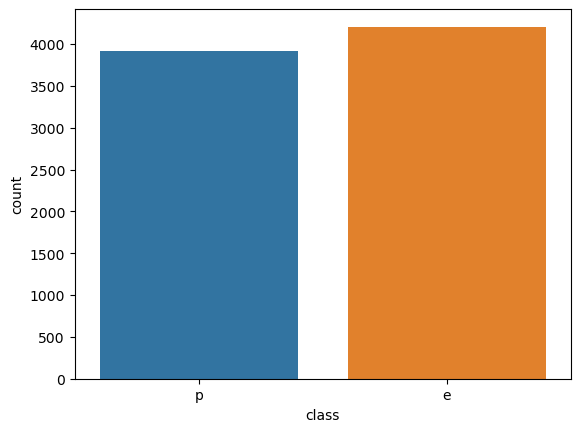

In [28]:
sns.countplot(data=df,x='class')

In [29]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [30]:
desc = df.describe().transpose().reset_index().sort_values('unique')
desc.head()

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812


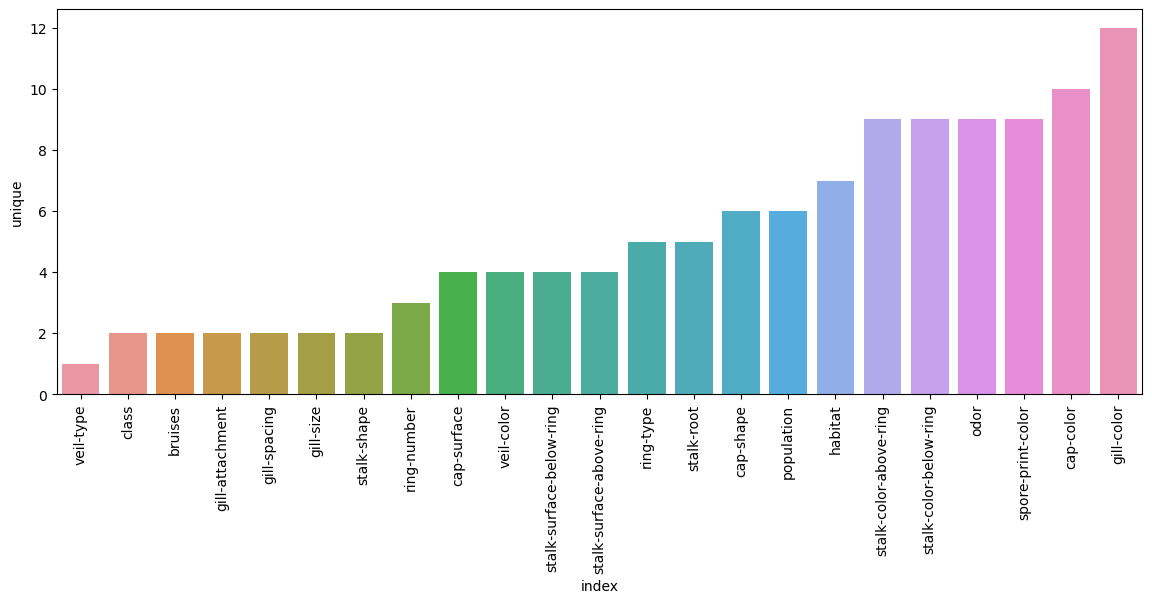

In [31]:
plt.figure(figsize=(14,5))
sns.barplot(data=desc,x='index',y='unique')
plt.xticks(rotation=90)
plt.show()

In [32]:
#Train Test Split
X = df.drop('class',axis=1)
y = df['class']

In [33]:
X = pd.get_dummies(X,drop_first=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=101)

In [36]:
# Model

from sklearn.ensemble import AdaBoostClassifier

mod = AdaBoostClassifier(n_estimators=1)

In [37]:
mod.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [38]:
from sklearn.metrics import classification_report,accuracy_score

pred = mod.predict(X_test)
pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [40]:
mod.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
mod.feature_importances_.argmax()

22

In [42]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

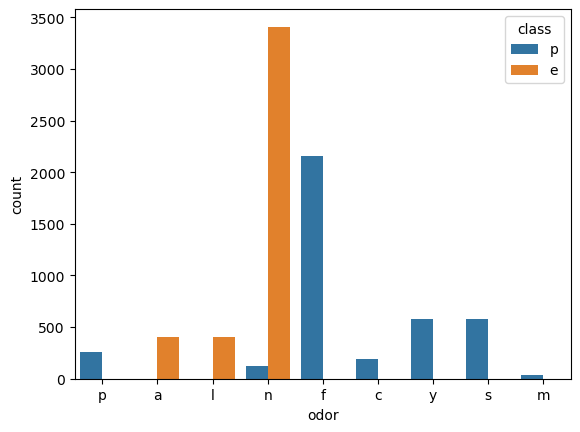

In [43]:
sns.countplot(data=df,x='odor', hue='class')

In [44]:
len(X.columns)

95

In [45]:
error = []

for f in range(1,96):
    mod = AdaBoostClassifier(n_estimators=f)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    
    error.append(1-accuracy_score(y_test,pred))

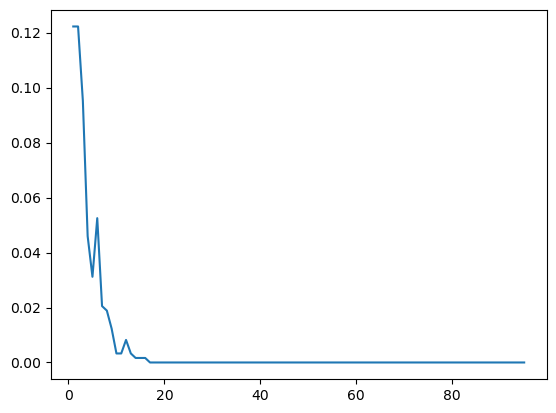

In [46]:
plt.plot(range(1,96),error)

In [47]:
mod

AdaBoostClassifier(n_estimators=95)

In [48]:
mod.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [49]:
feat = pd.DataFrame(index= X.columns, data=mod.feature_importances_, columns=['Important Features'])
feat

,Important Features
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


<Axes: >

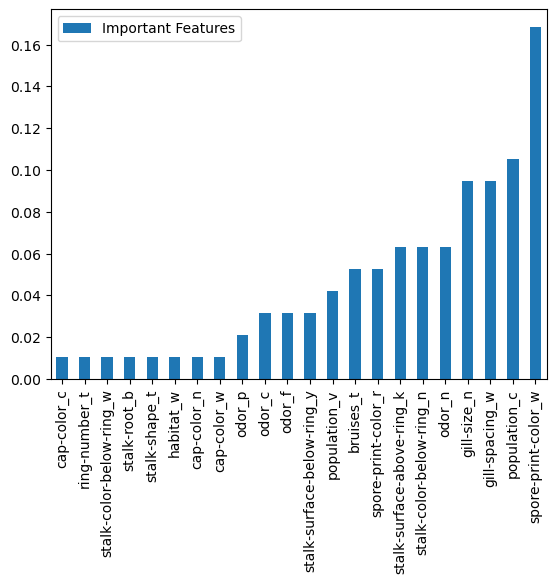

In [50]:
feat[feat['Important Features']>0].sort_values('Important Features').plot(kind='bar')

# Gradient Boosting and Grid Search CV

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators':[40,100,110,128],'max_depth':[3,4,5,6]}

In [56]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()

grid = GridSearchCV(gb,param_grid)

In [57]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [40, 100, 110, 128]})

In [58]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
y_pred = grid.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [63]:
feat_import=grid.best_estimator_.feature_importances_

In [65]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats.sort_values('Importance',ascending=False)

,Importance
odor_n,0.614763
stalk-root_c,0.136009
bruises_t,0.051588
stalk-surface-below-ring_y,0.049535
spore-print-color_r,0.030495
...,...
gill-color_e,0.000000
veil-color_o,0.000000
veil-color_w,0.000000
odor_y,0.000000


In [67]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.0647,0.0,0.0,2.455671e-16,0.000393,0.614763


In [75]:
imp = imp_feats[imp_feats['Importance']>0.000393].sort_values(by='Importance',ascending=False)
imp

,Importance
odor_n,0.614763
stalk-root_c,0.136009
bruises_t,0.051588
stalk-surface-below-ring_y,0.049535
spore-print-color_r,0.030495
odor_f,0.021059
stalk-root_r,0.019717
odor_l,0.018250
gill-spacing_w,0.012509
gill-size_n,0.010687


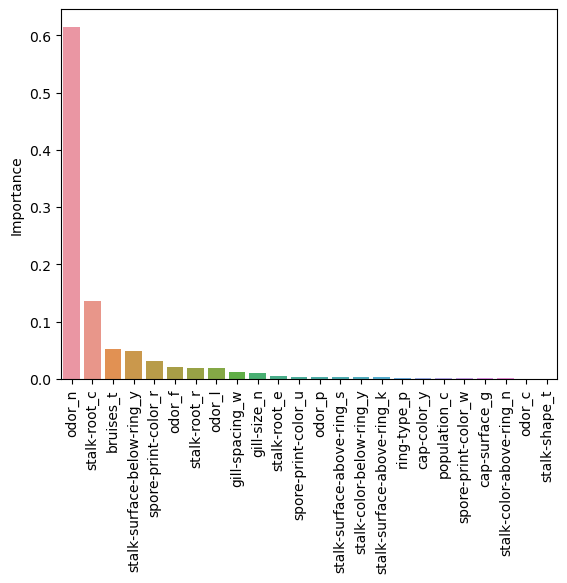

In [76]:
sns.barplot(data=imp,x=imp.index,y='Importance')
plt.xticks(rotation=90)
plt.show()